### Lecture 5 of Computational Aspectes of Machine Learning: course 2021-2022
If you have questions about this notebook contact Melissa Lopez at m.lopez@uu.nl

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing as pp
import matplotlib.pyplot as plt
from sklearn.preprocessing import MaxAbsScaler, MinMaxScaler
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix

# Load classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier

dtc = DecisionTreeClassifier(random_state=0)
rfc = RandomForestClassifier(random_state=0)
gbc = GradientBoostingClassifier(random_state=0)
abc = AdaBoostClassifier(n_estimators=100, random_state=0)
mlpc = MLPClassifier(random_state=1, max_iter=300)
gpc = GaussianProcessClassifier()

In this example we intend to distinguish triggers generated by:
- A type of transient noise called Blip glitch.
- A gravitational wave entering the detector.

For this aim we coded the following functions:
- load_data: this function loads the pre-processed data set. The inputs have 2 variables: chirp mass and effective spin.
- decision_boundariesplots: this function plots the boundaries defined by the classifiers (modified from https://scikit-learn.org/stable/auto_examples/tree/plot_iris_dtc.html#sphx-glr-auto-examples-tree-plot-iris-dtc-py)
- get_scores_with_decision_boundaries: to get the accuracy of the classifier and plot decision boundaries.

In [2]:
def load_data(train_percentage):
    """
        We load a balanced (N injections, N glitches) and shuffle the dataset. 
        We choose how much data we want to train and test (in percentage). 
    Input
    -----
    train_percentage: training and testing split (train: train_percentage , test: 1-train_percentage)
    
    Output
    ------
    X, y: dataset for classification in the form of (input, target)
    """
    X = pd.read_pickle('./data/input.csv')
    y = np.load('./data/target.npy')
    
    X, y = shuffle(X, y)
    
    X_train = X[:int(len(X)*train_percentage)]
    y_train = y[:int(len(X)*train_percentage)]
    X_test = X[int(len(X)*train_percentage):]
    y_test = y[int(len(X)*train_percentage):]
    return X_train, y_train, X_test, y_test

In [3]:
def decision_boundaries_plots(input_list, target_list, label_list, clf):
    """
        This function plots the decission boundaries of the desired classifier. 
        
    Input
    ------
    input_list: (list) contains training input and testing input as numpy arrays
    target_list: (list) contains training target and testing target as numpy arrays
    label_list: (list) contains label of training and testing as str
    
    Output
    ------
    plots
    
    """
    
    ct=0
    fig, axs = plt.subplots(1, 2, figsize=(10,6))
    for x, y, stage in zip(input_list, target_list, label_list):

        X = np.array(x)
        plot_step = 0.02
        x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
        y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
        xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))

        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        cs = axs[ct].contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.6)

        glt = list()
        inj = list()
        for i in range(len(X)):
            if y[i] == 0:
                glt.append(X[i])
            else:
                inj.append(X[i])
        glt = np.array(glt); inj = np.array(inj)

        axs[ct].scatter(glt[:, 0], glt[:, 1], c='crimson', label='Glitches', edgecolor='maroon')
        axs[ct].scatter(inj[:, 0], inj[:, 1], c='blue', label='Injections',  edgecolor='navy')
        axs[ct].set_xlabel(r'$\chi_{eff}$', fontsize=13), axs[ct].set_ylabel(r'$\mathcal{M}$', fontsize=13)
        axs[ct].set_title(stage, fontsize=15)
        axs[ct].set_xlim(-0.05, 1.05), axs[ct].set_ylim(-0.05, 1.05)
        axs[ct].legend()
        ct=ct+1
    fig.suptitle('Glitches against injections classified by '+str(c), fontsize=15)
    plt.tight_layout()
    plt.show()

In [4]:
def get_scores_with_decision_boundaries(train_percentage, classifier):
    """
        We return the accuracy of each classifier for a certain glitch type. TODO: extend to multi-class problem.
    
    Input
    -----
    template_bank: dataset with 'bags' of feature vectors
    inj_data: dataset with injections. TODO: update dataset
    types: glitch type to classify
    train_percentage: training and testing split (train: train_percentage , test: 1-train_percentage)
    classifier: type of classifier defined above
    
    Output
    ------
    acc_test: test accuracy of the classifier
    
    """
    X_train, y_train, X_test, y_test = load_data(train_percentage=0.8)
    clf = classifier.fit(X_train, y_train)
    
    decision_boundaries_plots([X_train, X_test], [y_train, y_test], ['Training', 'Testing'], clf)
    
    y_pred_train = clf.predict(X_train)
    y_pred = clf.predict(X_test)
    acc_test = clf.score(X_test, y_test)
    print('Training accuracy: '+str(np.round(clf.score(X_train, y_train), 3))+', testing accuracy: '+str(np.round(acc_test, 3)))
    print('Confusion matrix of training:'+str(confusion_matrix(y_train, y_pred_train).ravel()))
    print('Confusion matrix of training:'+str(confusion_matrix(y_test, y_pred).ravel()))
    return acc_test

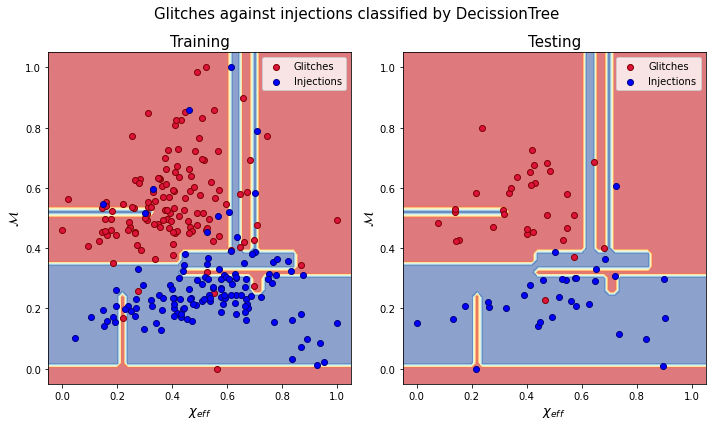

Training accuracy: 1.0, testing accuracy: 0.906
Confusion matrix of training:[127   0   0 127]
Confusion matrix of training:[29  3  3 29]


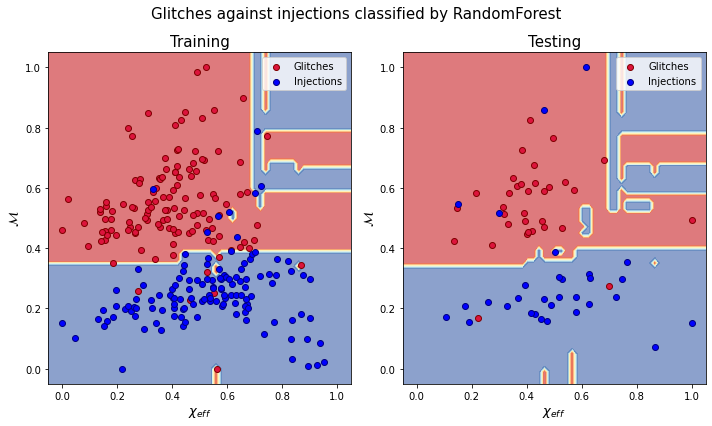

Training accuracy: 1.0, testing accuracy: 0.906
Confusion matrix of training:[126   0   0 128]
Confusion matrix of training:[31  2  4 27]


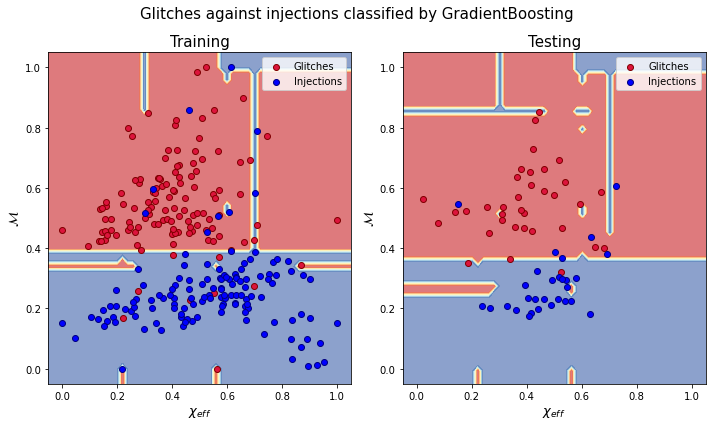

Training accuracy: 1.0, testing accuracy: 0.859
Confusion matrix of training:[124   0   0 130]
Confusion matrix of training:[31  4  5 24]


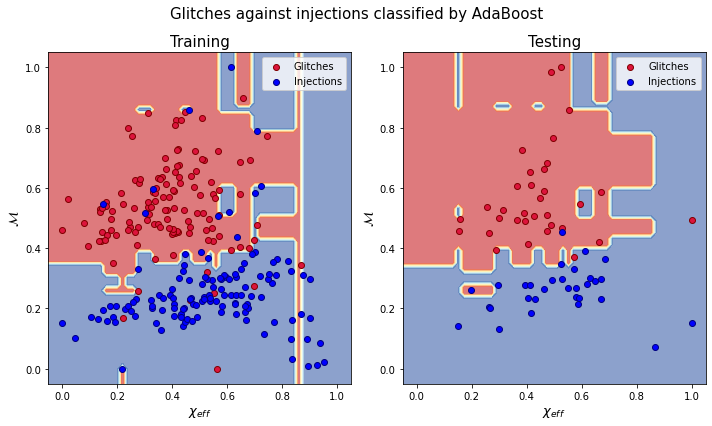

Training accuracy: 0.957, testing accuracy: 0.875
Confusion matrix of training:[120   6   5 123]
Confusion matrix of training:[30  3  5 26]


/Users/Lopez050/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


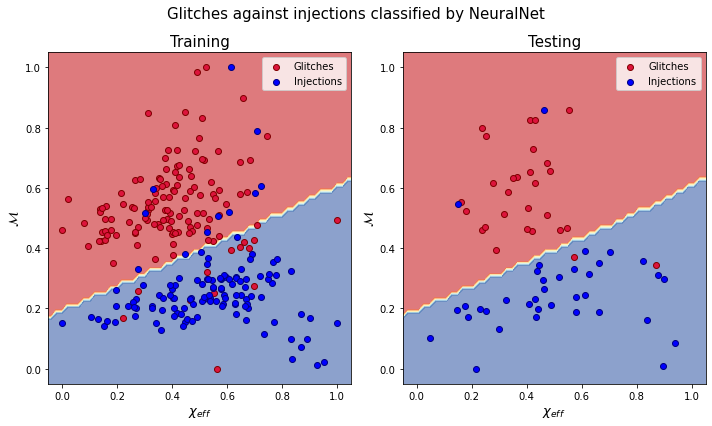

Training accuracy: 0.902, testing accuracy: 0.938
Confusion matrix of training:[117  14  11 112]
Confusion matrix of training:[26  2  2 34]


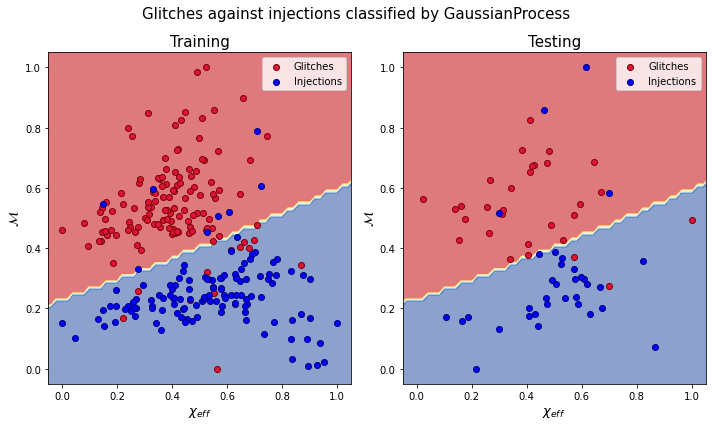

Training accuracy: 0.917, testing accuracy: 0.891
Confusion matrix of training:[116  13   8 117]
Confusion matrix of training:[27  3  4 30]


,DecissionTree,RandomForest,GradientBoosting,AdaBoost,NeuralNet,GaussianProcess
Blips,0.906,0.906,0.859,0.875,0.938,0.891


In [5]:
classifiers = ['DecissionTree', 'RandomForest', 'GradientBoosting', 'AdaBoost', 'NeuralNet', 'GaussianProcess']

matrix = np.empty([1, len(classifiers)])
for j, c in enumerate(classifiers):
    
    if c == 'DecissionTree':
        classifier = dtc
        
    if c == 'RandomForest': 
        classifier = rfc
        
    if c == 'GradientBoosting': 
        classifier = gbc
        
    if c == 'AdaBoost':
        classifier = abc
        
    if c == 'NeuralNet': 
        classifier = mlpc
        
    if c == 'GaussianProcess': 
        classifier = gpc
        

    acc_test = get_scores_with_decision_boundaries(0.8, classifier)
    matrix[0][j]= acc_test

df = pd.DataFrame(data=np.round(matrix, 3), index= ['Blips'],
                 columns = classifiers)

display(df)

Which is the best classifier for this glitch? Do the same process for koy fish glitch (input2.csv adn target2.npy). Is the best classifier still the same? Why? 
Explore other classifiers from sklearn (https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html).